In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import pandas as pd
df=pd.read_csv("/content/gdrive/MyDrive/Dataset/BlackFriday.csv")

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.shape

(550068, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
del df['Product_Category_2']
del df['Product_Category_3']

In [9]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [10]:
for column in df.columns:
  print(column,":",df[column].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 20
Purchase : 18105


In [11]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [14]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [15]:
df['Marital_Status'].unique()

array([0, 1])

In [16]:
df['Purchase'].sum()

5095812742

In [17]:
df['Purchase'].mean()

9263.968712959126

<Axes: title={'center': 'Gender Ratio'}>

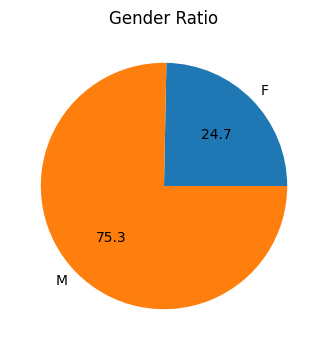

In [18]:
df.groupby('Gender').size().plot(kind='pie',figsize=(4,4),autopct='%0.1f',title='Gender Ratio')

<Axes: xlabel='Gender'>

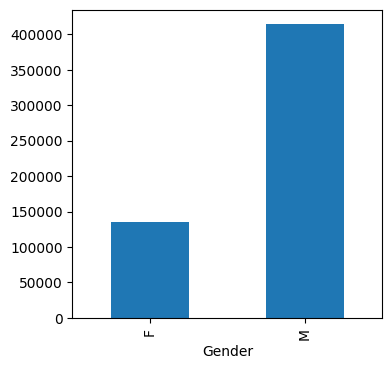

In [19]:
df.groupby('Gender').size().plot(kind='bar',figsize=(4,4))

In [20]:
df.groupby('Gender').size()

Gender
F    135809
M    414259
dtype: int64

<ipython-input-21-066c7c4e5e46>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').sum()['Purchase'].plot(kind='pie',autopct="%0.1f",figsize=(4,4))


<Axes: ylabel='Purchase'>

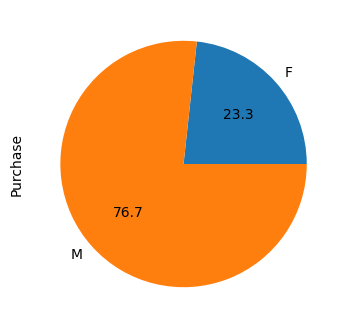

In [21]:
df.groupby('Gender').sum()['Purchase'].plot(kind='pie',autopct="%0.1f",figsize=(4,4))

<ipython-input-22-0ed4403a39d4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').mean()['Purchase'].plot(kind='pie',autopct="%0.1f",figsize=(4,4))


<Axes: ylabel='Purchase'>

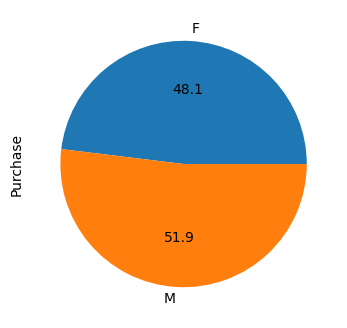

In [22]:
df.groupby('Gender').mean()['Purchase'].plot(kind='pie',autopct="%0.1f",figsize=(4,4))

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

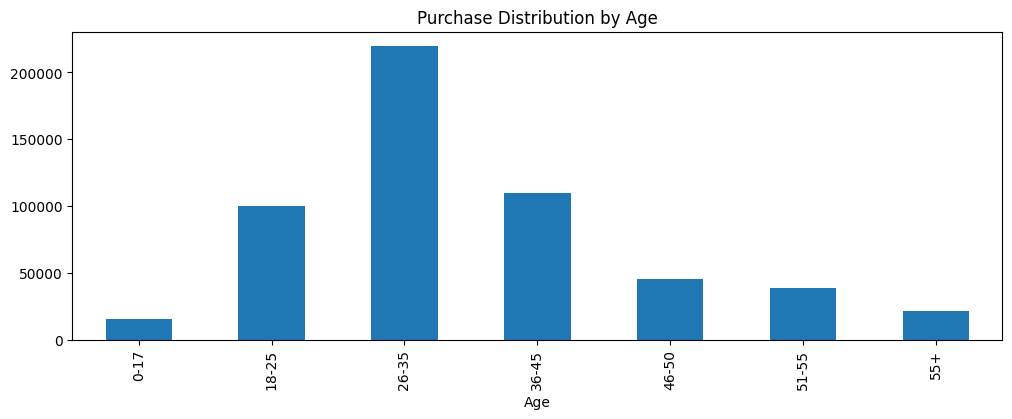

In [23]:
df.groupby('Age').size().plot(kind='bar',figsize=(12,4),title='Purchase Distribution by Age')

In [24]:
lst=[]
for i in df['Age'].unique():
  lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])

In [25]:
data=pd.DataFrame(lst,columns=['Age','Products'])
data

,Age,Products
0,0-17,2323
1,55+,2584
2,26-35,3427
3,46-50,3106
4,51-55,2887
5,36-45,3328
6,18-25,3220


<Axes: xlabel='Age'>

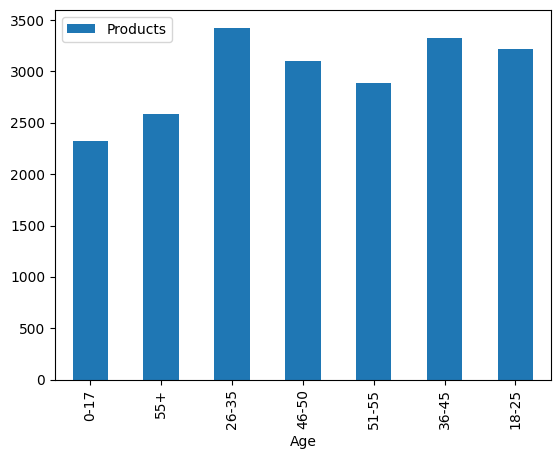

In [26]:
data.plot.bar(x='Age')

<ipython-input-27-06b8baf3000a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').sum()['Purchase'].plot(kind='bar',figsize=(12,4),title='Amount Spend by Age')


<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

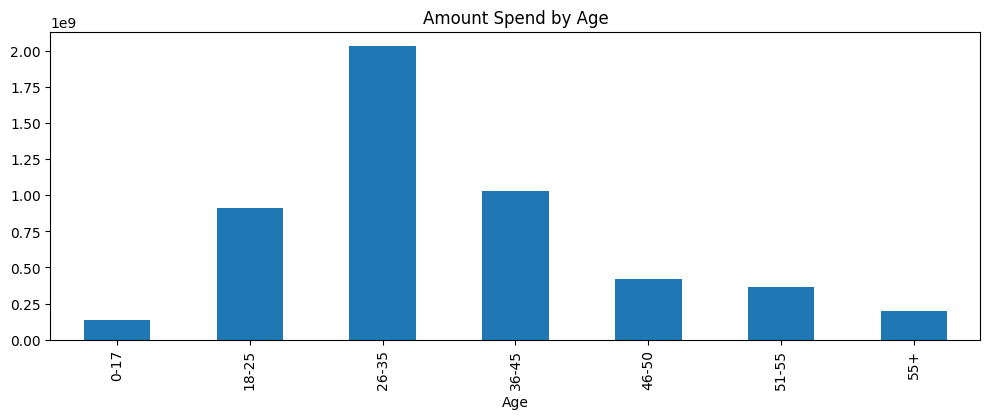

In [27]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar',figsize=(12,4),title='Amount Spend by Age')

<ipython-input-28-2e29a7fe72cd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').mean()['Purchase'].plot(kind='pie',figsize=(12,4),title=' Mean Amount Spend by Age',autopct='%0.1f')


<Axes: title={'center': ' Mean Amount Spend by Age'}, ylabel='Purchase'>

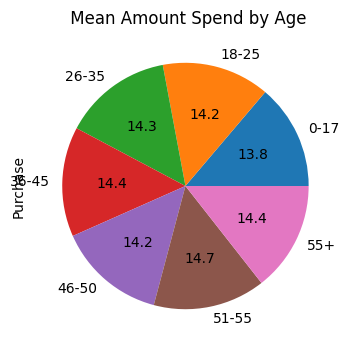

In [28]:
df.groupby('Age').mean()['Purchase'].plot(kind='pie',figsize=(12,4),title=' Mean Amount Spend by Age',autopct='%0.1f')

<Axes: title={'center': 'Marital Status'}>

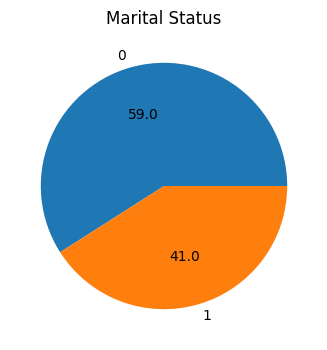

In [29]:
df.groupby('Marital_Status').size().plot(kind='pie',figsize=(12,4),title='Marital Status',autopct='%0.1f')

<Axes: xlabel='Age', ylabel='count'>

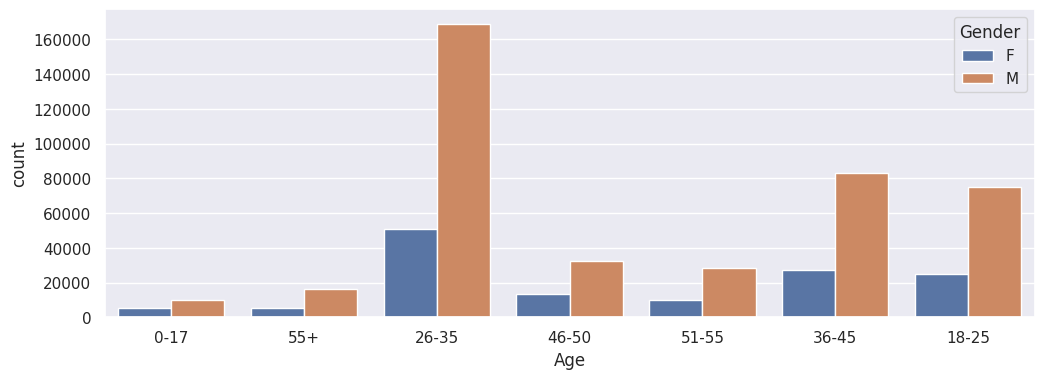

In [30]:
import seaborn as sns
sns.set(rc={'figure.figsize': (12,4)})
sns.countplot(x='Age',hue='Gender',data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

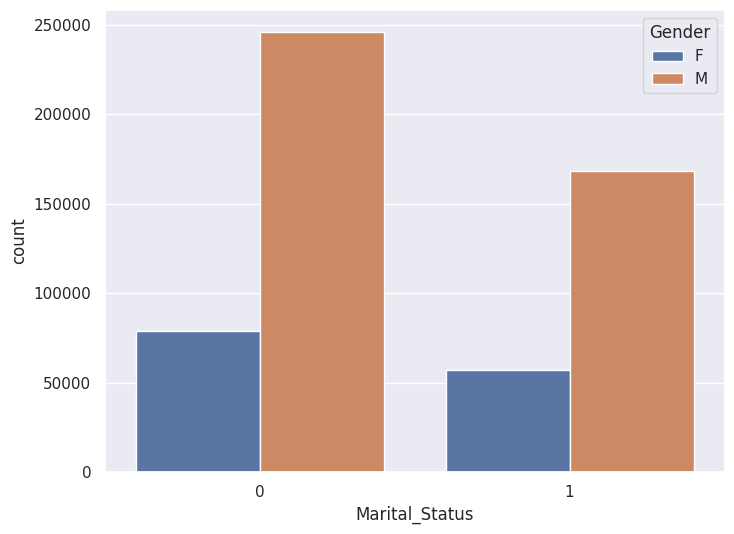

In [31]:
sns.set(rc={'figure.figsize': (8,6)})
sns.countplot(x='Marital_Status',hue='Gender',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

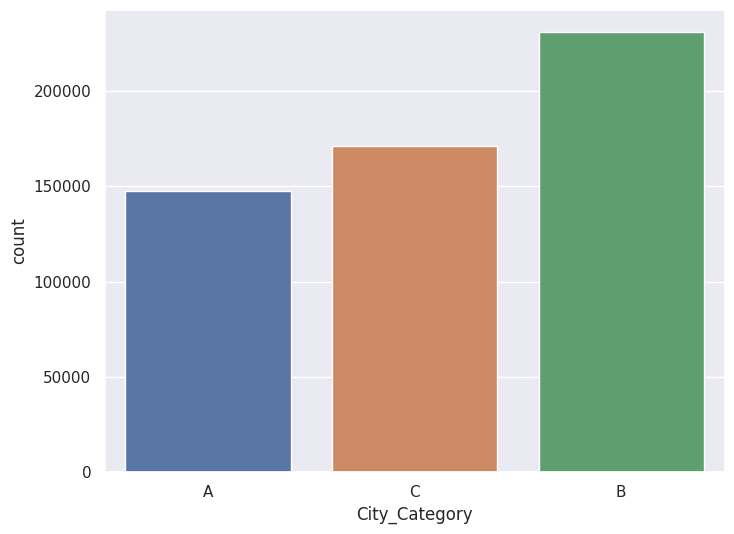

In [32]:
sns.countplot(x=df['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

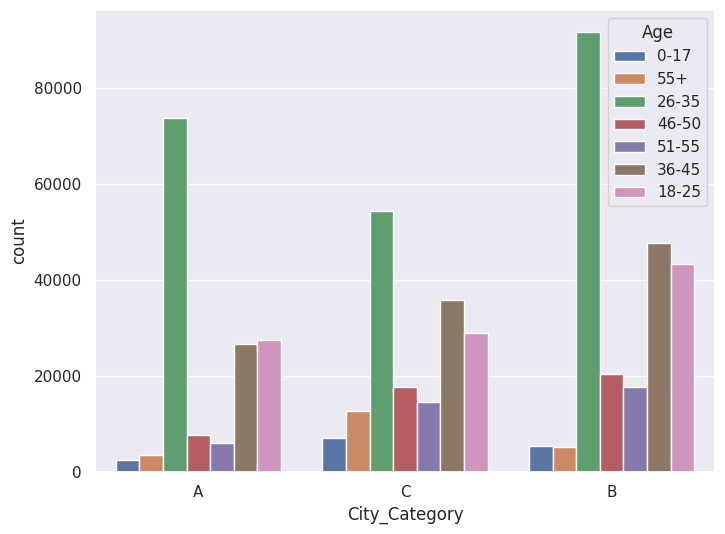

In [33]:
sns.countplot(x='City_Category',hue='Age',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

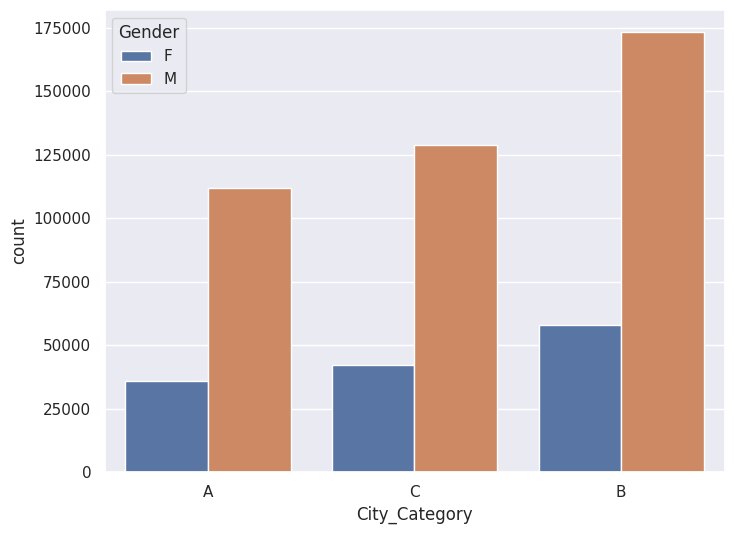

In [34]:
sns.countplot(x='City_Category', hue='Gender',data=df)

<ipython-input-35-aef245ca9efc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('City_Category').sum()['Purchase'].plot(kind='pie',figsize=(12,4),autopct='%0.1f')


<Axes: ylabel='Purchase'>

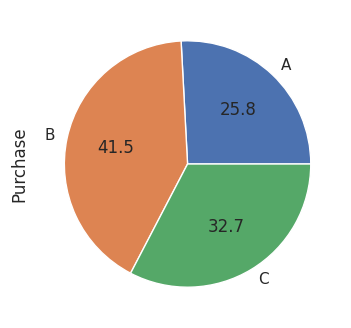

In [35]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie',figsize=(12,4),autopct='%0.1f')

<ipython-input-36-62c43b66f636>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('City_Category').mean()['Purchase'].plot(kind='pie',figsize=(12,4),autopct='%0.1f')


<Axes: ylabel='Purchase'>

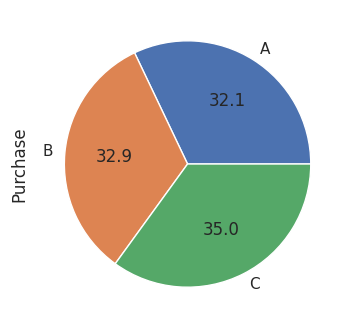

In [36]:
df.groupby('City_Category').mean()['Purchase'].plot(kind='pie',figsize=(12,4),autopct='%0.1f')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

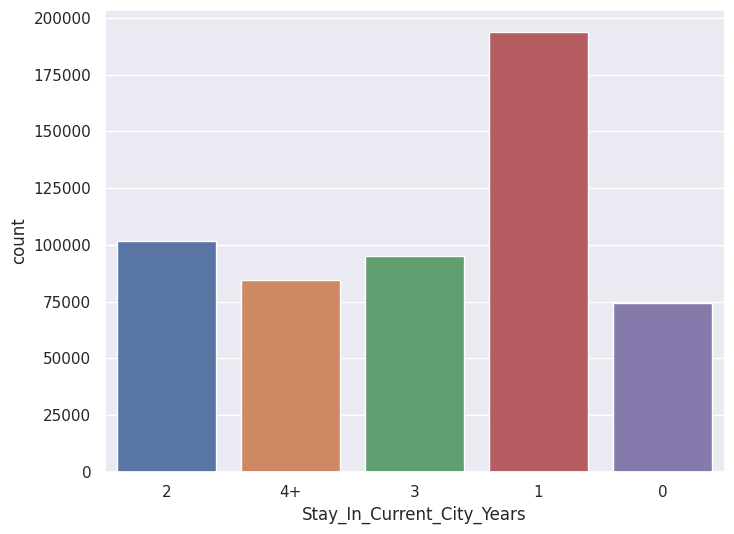

In [41]:
sns.countplot(x=df['Stay_In_Current_City_Years'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

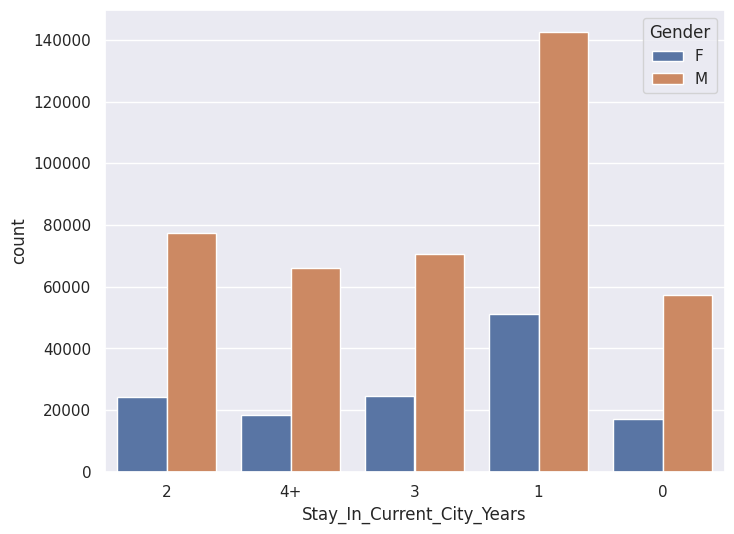

In [42]:
sns.countplot(x='Stay_In_Current_City_Years' ,hue='Gender',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

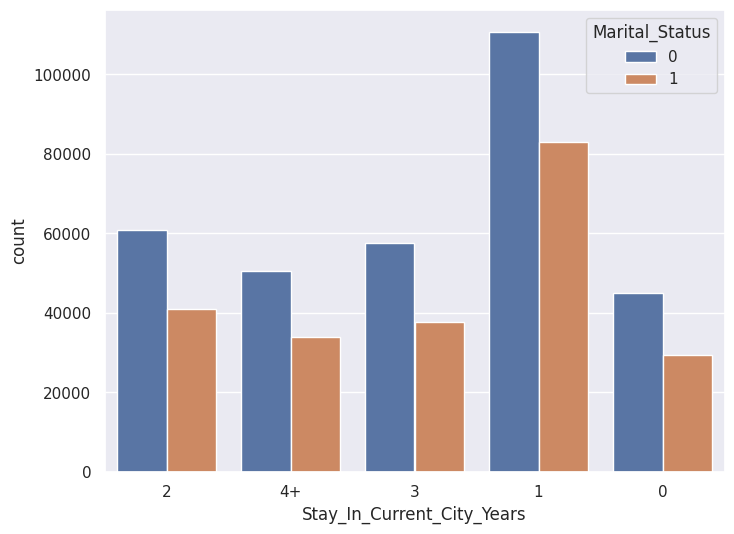

In [43]:
sns.countplot(x='Stay_In_Current_City_Years' ,hue='Marital_Status',data=df)